# Initial EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Daily Covid Data

In [12]:
# import the data
df_covid = pd.read_csv('../Data/silver/covid_data.csv')
df_covid.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


# Plots

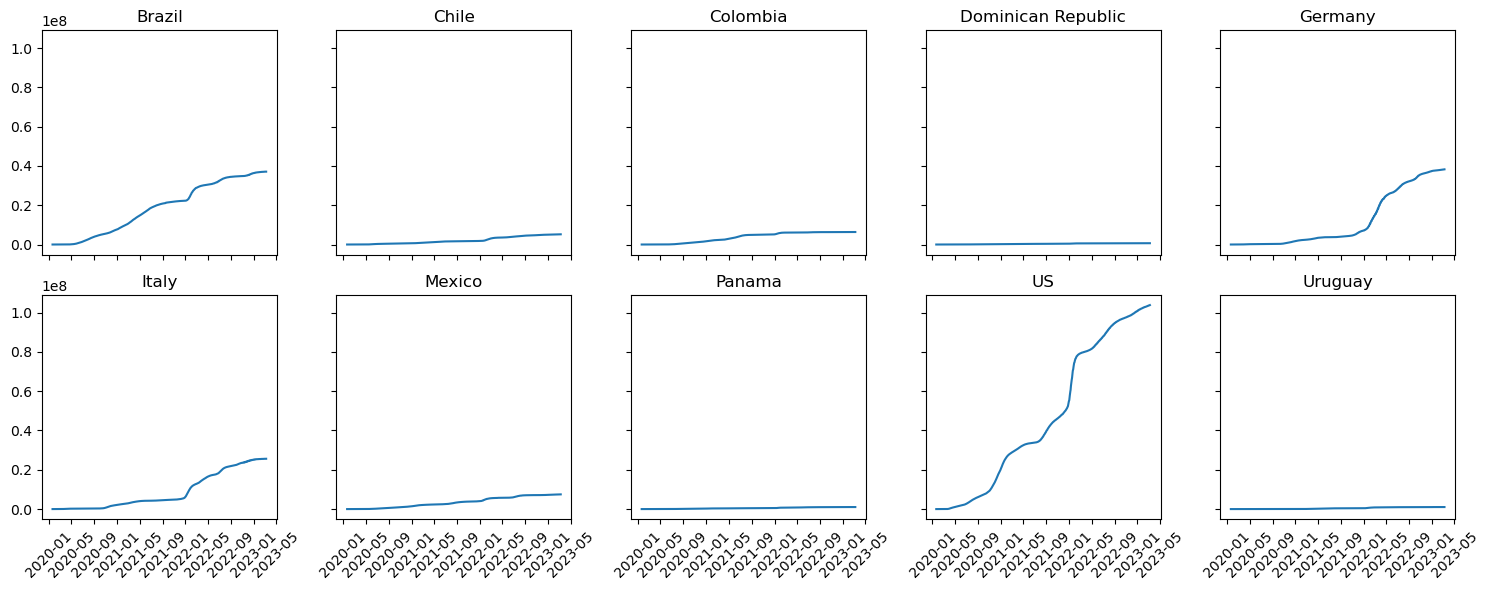

In [17]:
# Convert Date to datetime format
df_covid["date"] = pd.to_datetime(df_covid["date"])

# Create subplots: 5 columns x 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    ax.plot(country_data["date"], country_data["cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

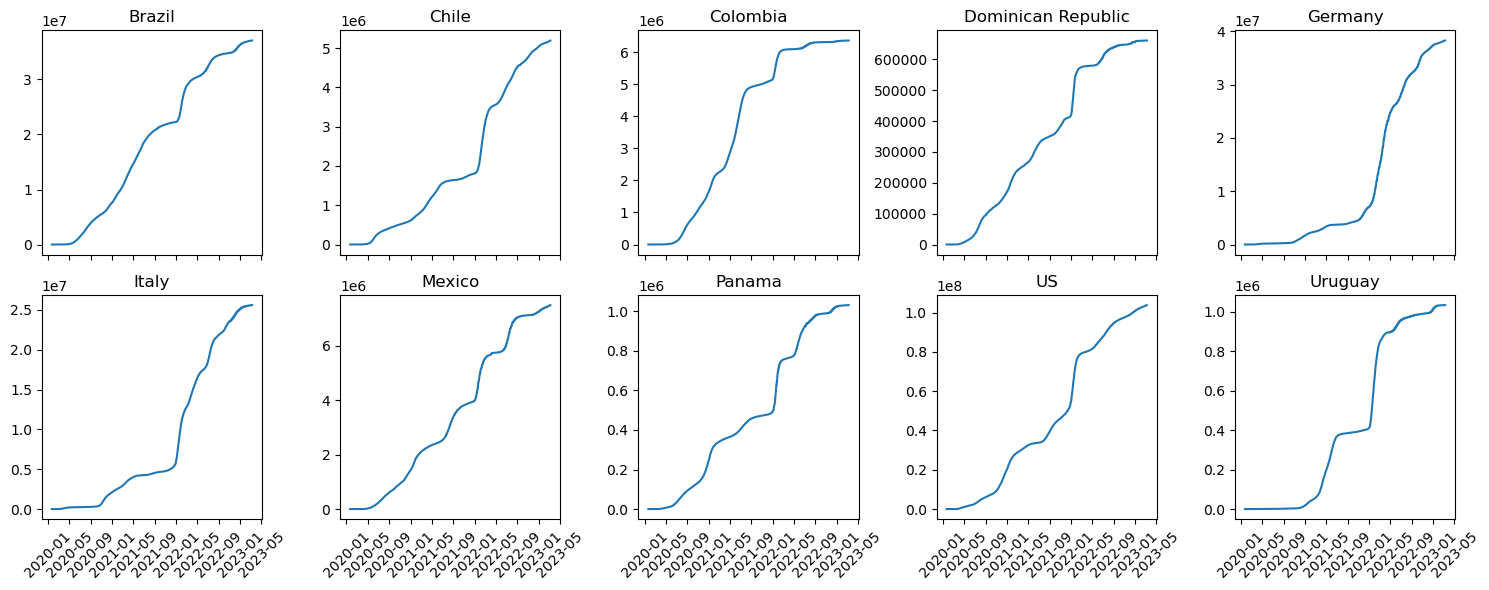

In [20]:
# Convert Date to datetime format
df_covid["date"] = pd.to_datetime(df_covid["date"])

# Create subplots: 5 columns x 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=False)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    ax.plot(country_data["date"], country_data["cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

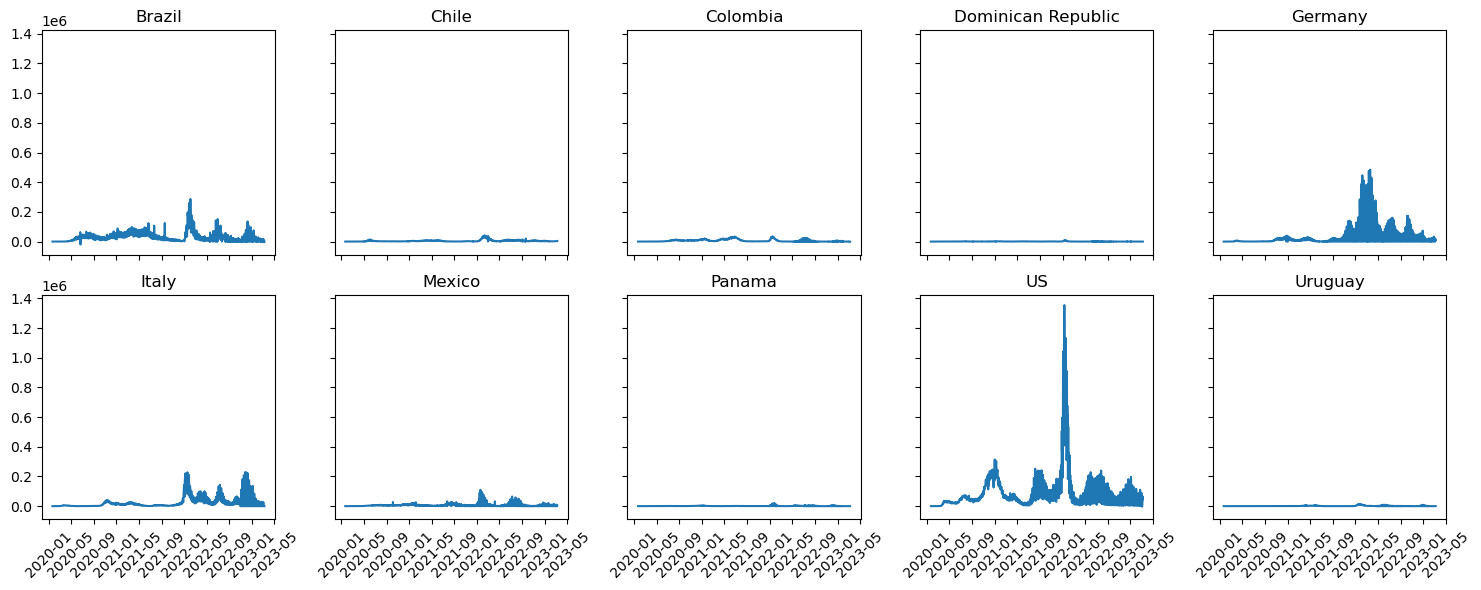

In [18]:
# Convert Date to datetime format
df_covid["date"] = pd.to_datetime(df_covid["date"])

# Create subplots: 5 columns x 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    ax.plot(country_data["date"], country_data["new_cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

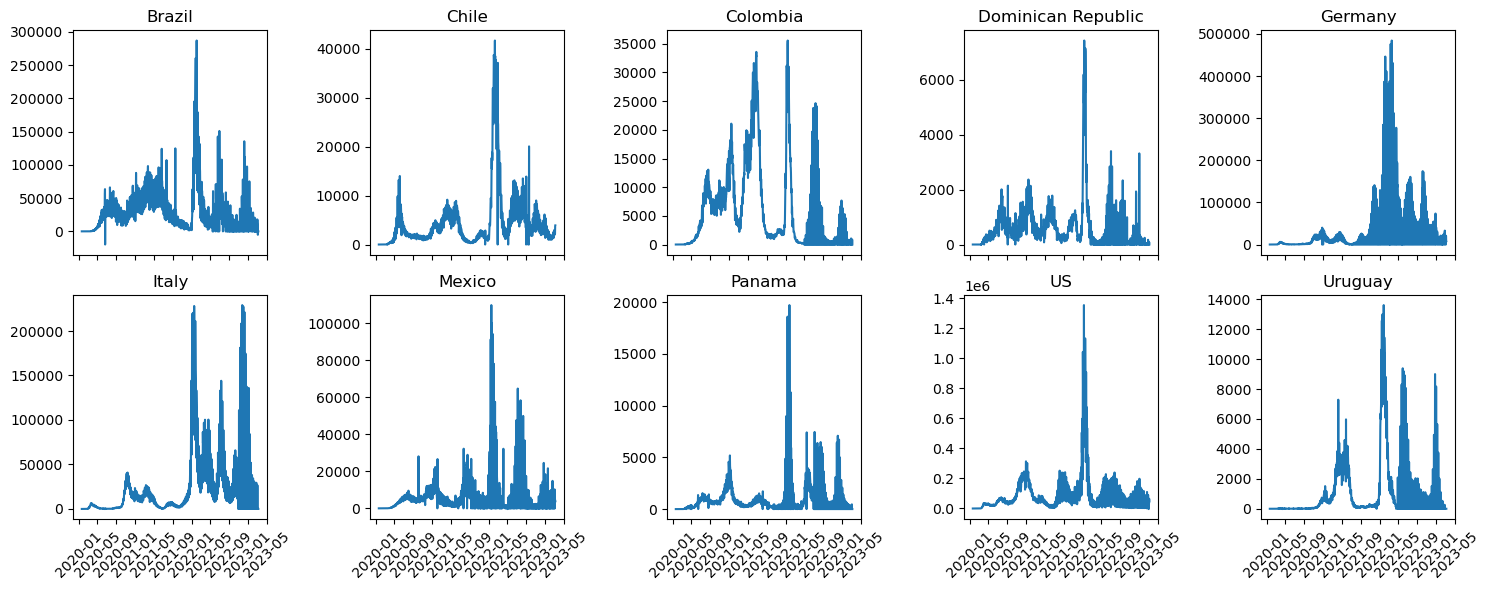

In [19]:
# Create subplots: 5 columns x 2 rows, but with independent y-axis scaling
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    ax.plot(country_data["date"], country_data["new_cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The countries have several peaks not only the first one, the largest peak overall is in 2022

# Time Series Plots

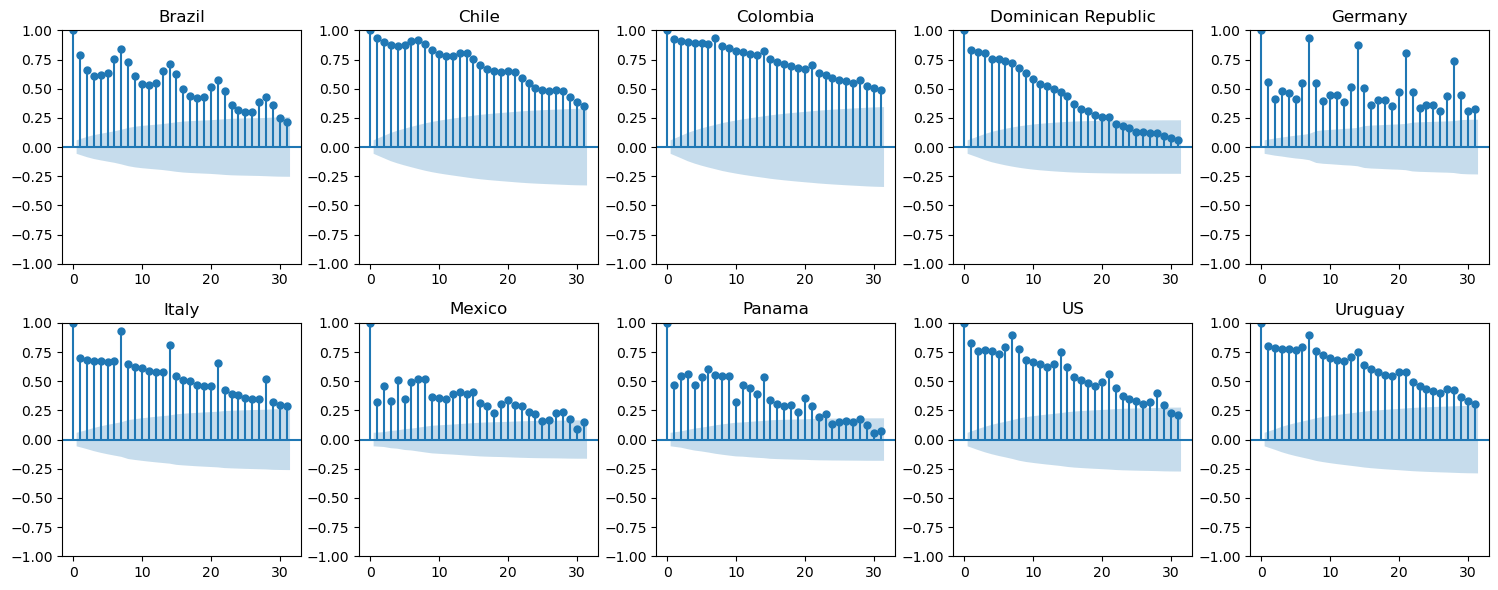

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# ACF and PACF

# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    plot_acf(country_data["new_cases"].dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

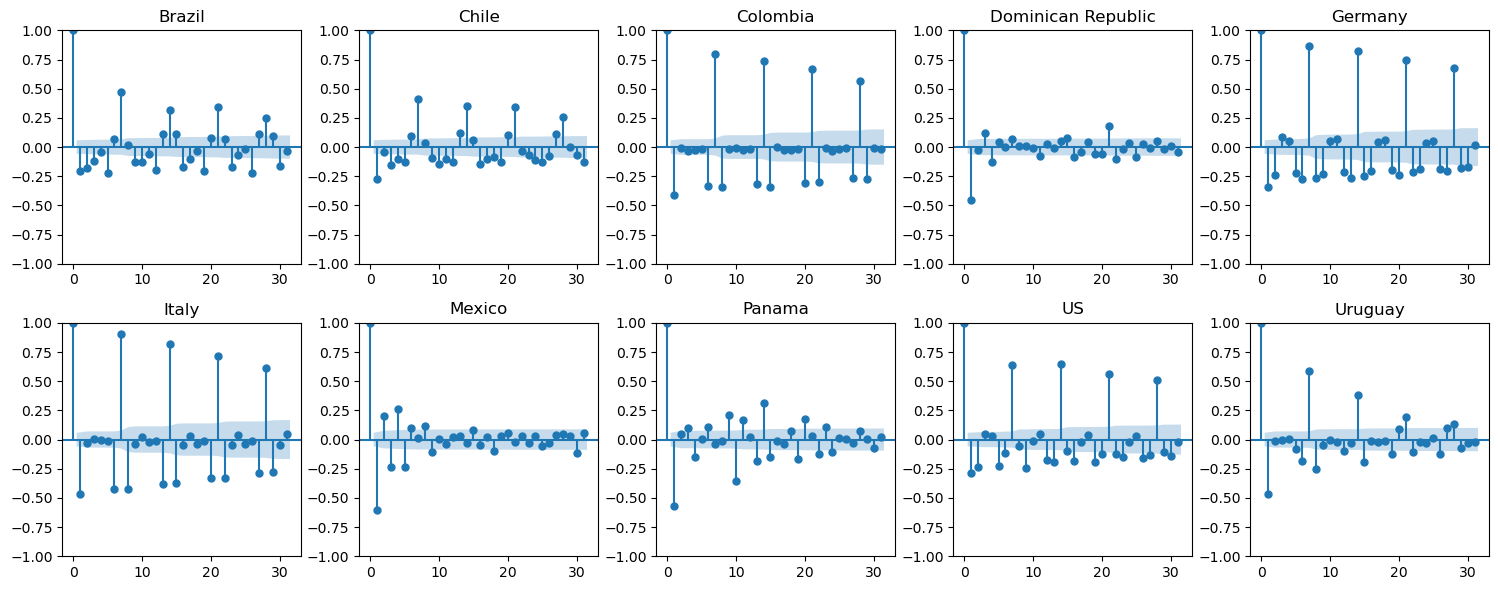

In [27]:
# check if differencing makes effect
# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid[df_covid["country"] == country]
    plot_acf(country_data["new_cases"].diff(1).dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

## Weekly Covid data

In [29]:
# import the data
df_covid_w = pd.read_csv('../Data/silver/covid_data_weekly.csv')
df_covid_w.head()

,country,date,new_cases,cases
0,Brazil,2020-01-20,0,0
1,Brazil,2020-01-27,0,0
2,Brazil,2020-02-03,0,0
3,Brazil,2020-02-10,0,0
4,Brazil,2020-02-17,0,0


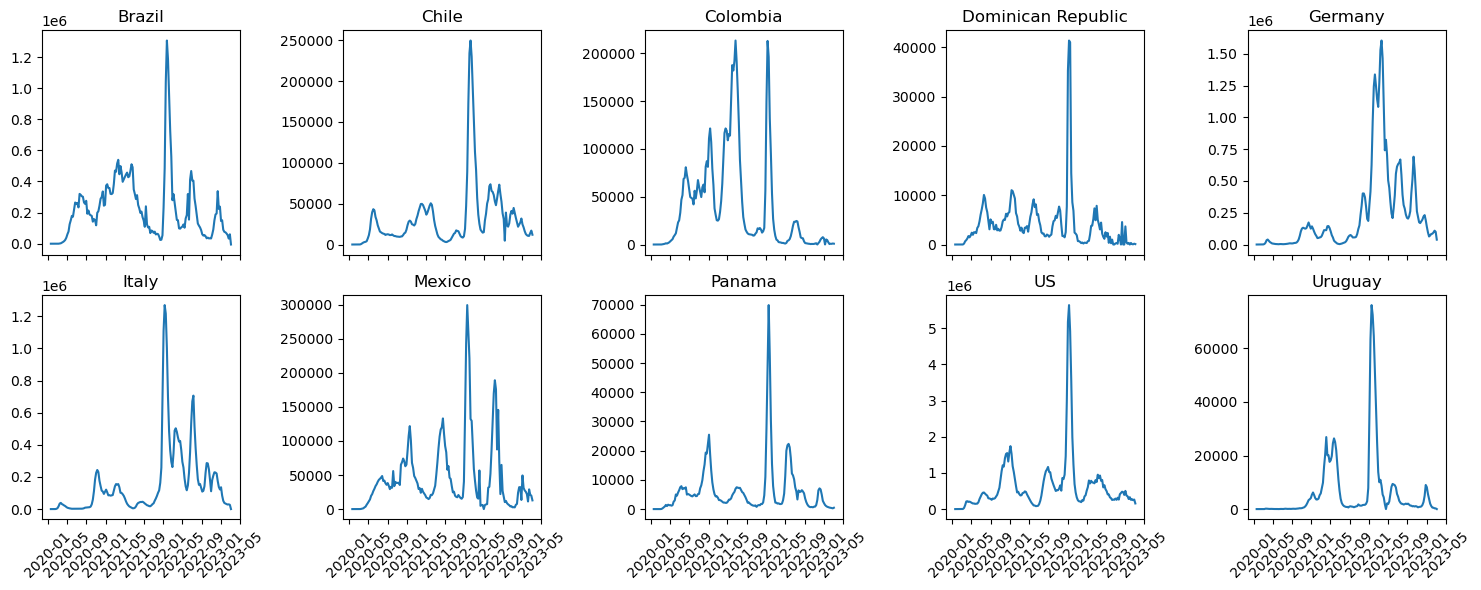

In [30]:
# Convert Date to datetime format
df_covid_w["date"] = pd.to_datetime(df_covid_w["date"])
# Create subplots: 5 columns x 2 rows, but with independent y-axis scaling
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid_w["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_w[df_covid_w["country"] == country]
    ax.plot(country_data["date"], country_data["new_cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

ACF Weekly cases

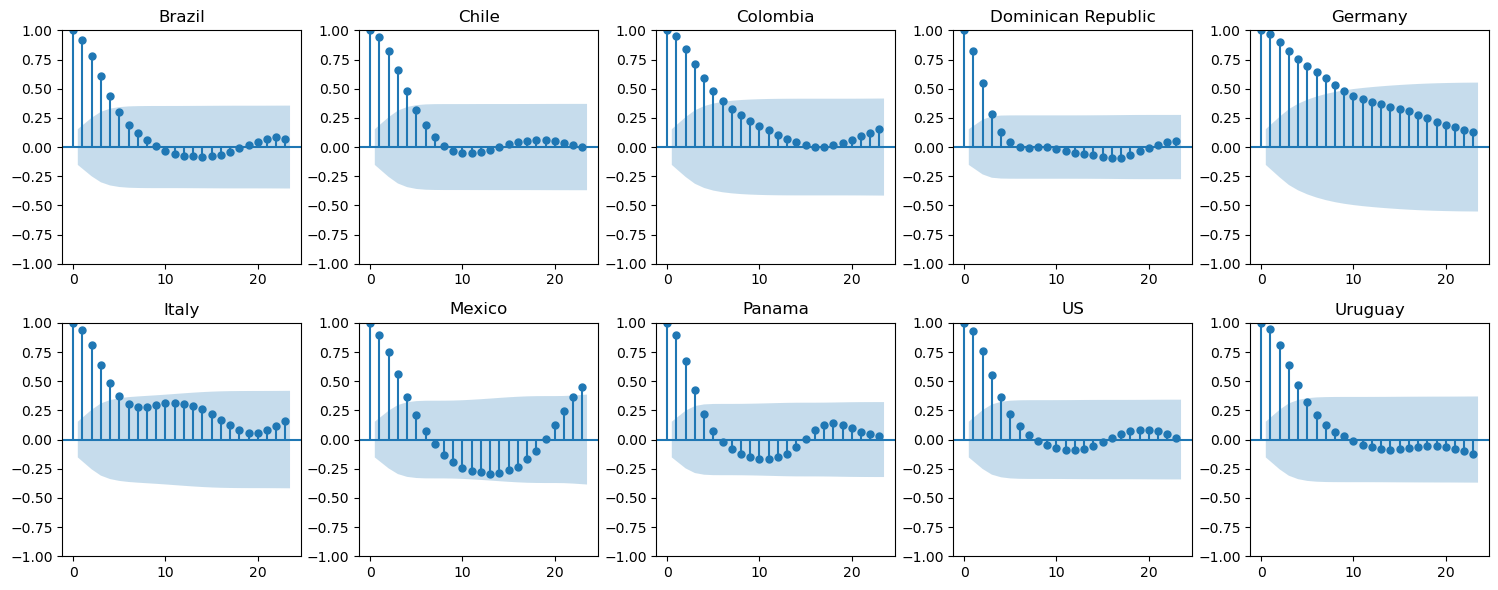

In [34]:

# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid_w["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_w[df_covid_w["country"] == country]
    plot_acf(country_data["new_cases"].dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

ACF Weekly cases differenced

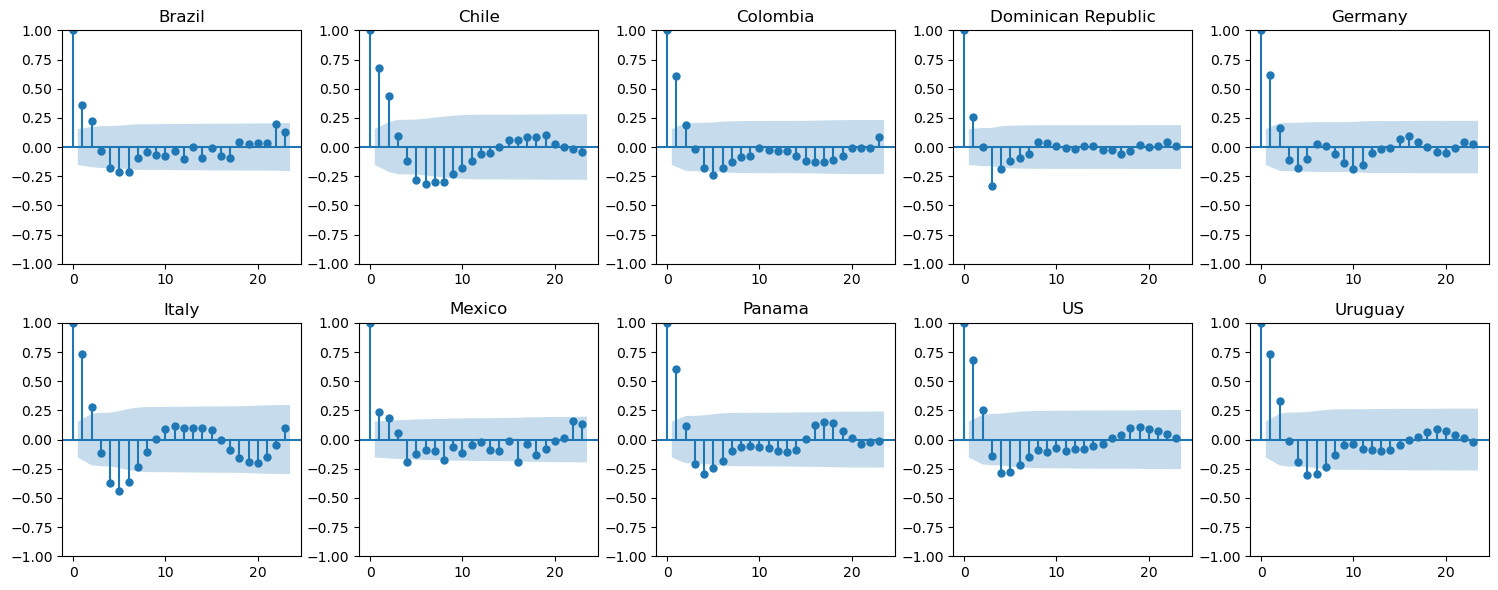

In [35]:
# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid_w["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_w[df_covid_w["country"] == country]
    plot_acf(country_data["new_cases"].diff(1).dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

ACF double difference

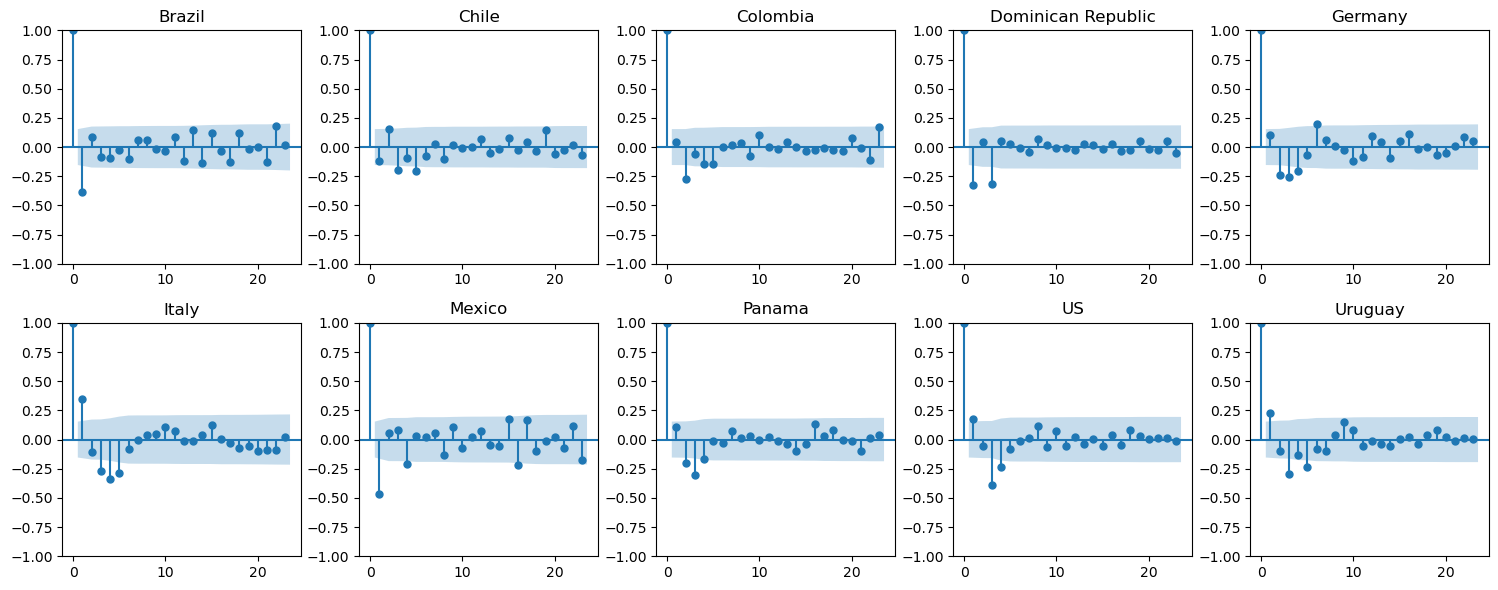

In [36]:
# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid_w["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_w[df_covid_w["country"] == country]
    plot_acf(country_data["new_cases"].diff(1).diff(1).dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

## Monthly Covid

In [37]:
# import the data
df_covid_m = pd.read_csv('../Data/silver/covid_data_monthly.csv')
df_covid_m.head()

,country,date,new_cases,cases
0,Brazil,2020-01-01,0,0
1,Brazil,2020-02-01,2,2
2,Brazil,2020-03-01,5715,5717
3,Brazil,2020-04-01,81470,87187
4,Brazil,2020-05-01,428950,516137


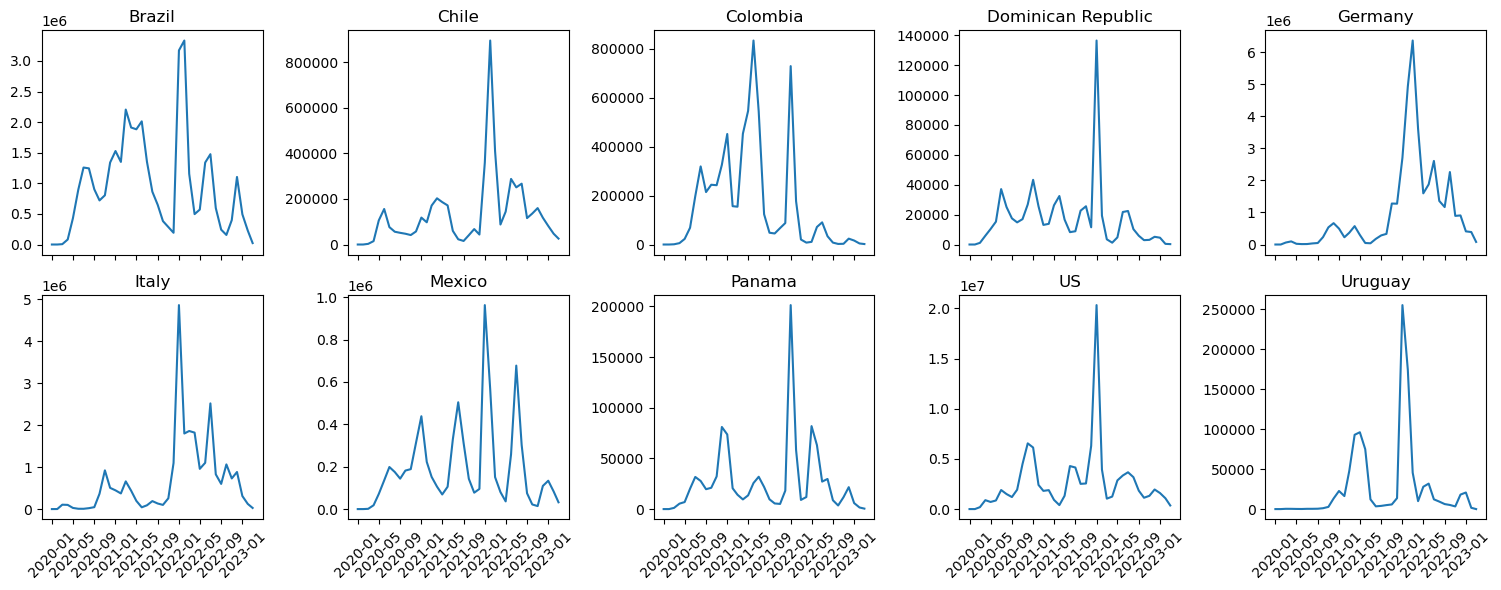

In [38]:
# Convert Date to datetime format
df_covid_m["date"] = pd.to_datetime(df_covid_m["date"])
# Create subplots: 5 columns x 2 rows, but with independent y-axis scaling
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True)
axes = axes.flatten()

# Loop over the first 10 unique countries and plot
for i, country in enumerate(df_covid_m["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_m[df_covid_m["country"] == country]
    ax.plot(country_data["date"], country_data["new_cases"], label=country)
    ax.set_title(country)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

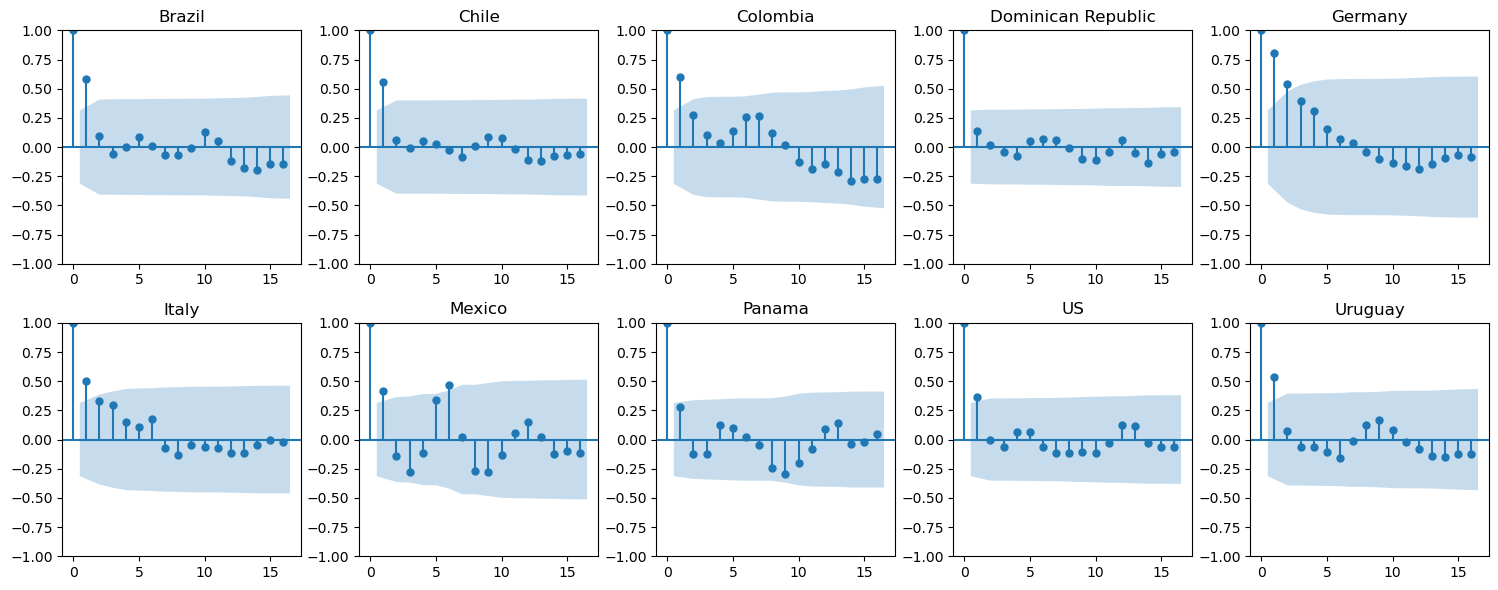

In [39]:

# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid_m["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_m[df_covid_m["country"] == country]
    plot_acf(country_data["new_cases"].dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()

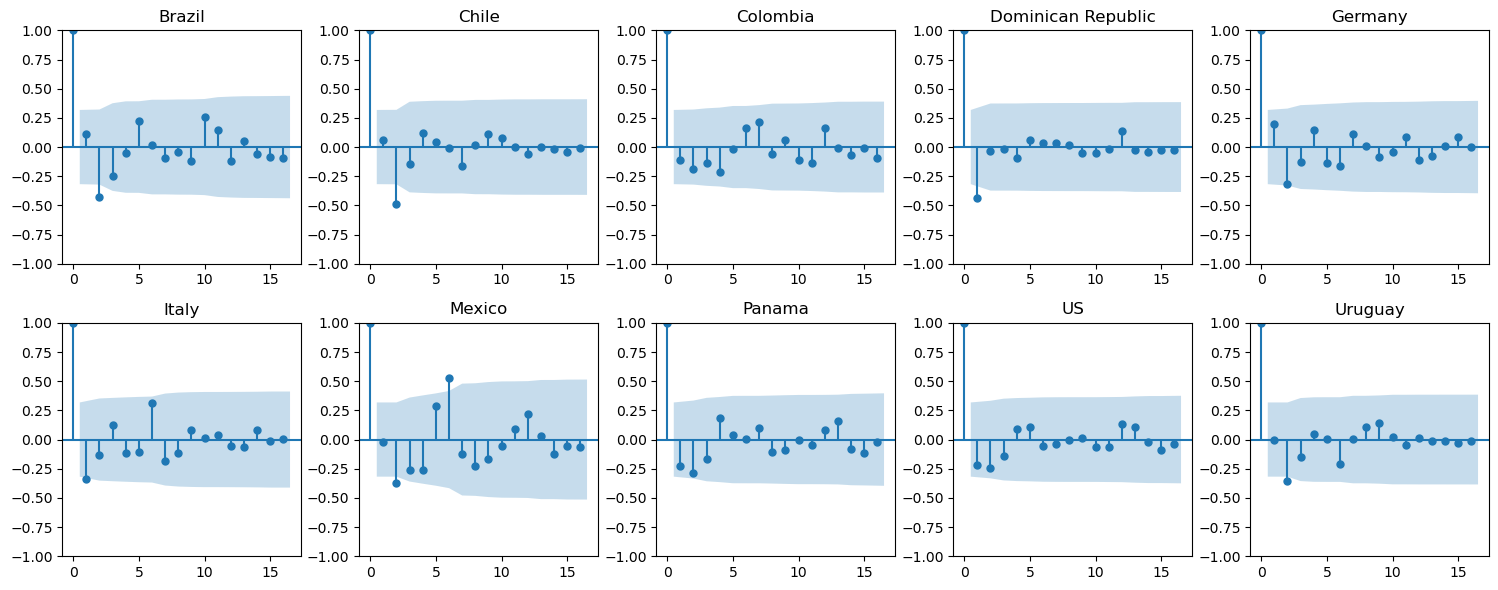

In [40]:

# Create subplots: 5 columns x 2 rows for ACF plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop over the first 10 unique countries and plot the ACF
for i, country in enumerate(df_covid_m["country"].unique()[:10]):
    ax = axes[i]
    country_data = df_covid_m[df_covid_m["country"] == country]
    plot_acf(country_data["new_cases"].diff(1).dropna(), ax=ax, title=country)

# Adjust layout
plt.tight_layout()
plt.show()